In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/Users/shay/Desktop/MIT/Courses/Machine Learning/Project/loan.csv')


In [4]:
#Shape of the Original dataset
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 39717
Number of columns: 111


In [5]:
if(len(df) == len(df.member_id.unique())):
    print('No duplicate data found')
else:
    print('Some Duplicates are found')

No duplicate data found


In [6]:
# post approval features -delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,
# recoveries,collection_recovery_fee,last_pymnt_d ,last_pymnt_amnt,next_pymnt_d ,chargeoff_within_12_mths

#Around 13 features are there which are Post approval so these are not useful to predict whether the loan should be given 
#to particular applicat or not


drop_cols = ["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "chargeoff_within_12_mths"]
df.drop(drop_cols, axis=1, inplace=True)
print("Features we are left with",list(df.columns))

Features we are left with ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp_inv', 'total_pymnt_inv', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_op

In [7]:
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 39717
Number of columns: 98


In [8]:
# remove non-required columns
# Not required : id,member_id ,emp_title,url,desc,title
# out_prncp_inv - not useful as its for investors
# total_pymnt_inv - not useful as it is for investors
# last_credit_pull_d - irrelevant for approval

## WE kept zip code and public bankruptcy 


drop_cols = ["id", "member_id", "funded_amnt","emp_title", "url", "desc", "title", "out_prncp_inv", "total_pymnt_inv", "last_credit_pull_d"]
df.drop(drop_cols, axis=1, inplace=True)
#print("Features we have in Dataset: ",list(df.columns))

In [9]:
#Missing value analysis
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
44,open_rv_12m,39717,100.000000
54,bc_open_to_buy,39717,100.000000
63,mths_since_recent_bc_dlq,39717,100.000000
62,mths_since_recent_bc,39717,100.000000
61,mort_acc,39717,100.000000
60,mo_sin_rcnt_tl,39717,100.000000
59,mo_sin_rcnt_rev_tl_op,39717,100.000000
58,mo_sin_old_rev_tl_op,39717,100.000000
57,mo_sin_old_il_acct,39717,100.000000
55,bc_util,39717,100.000000


<AxesSubplot:>

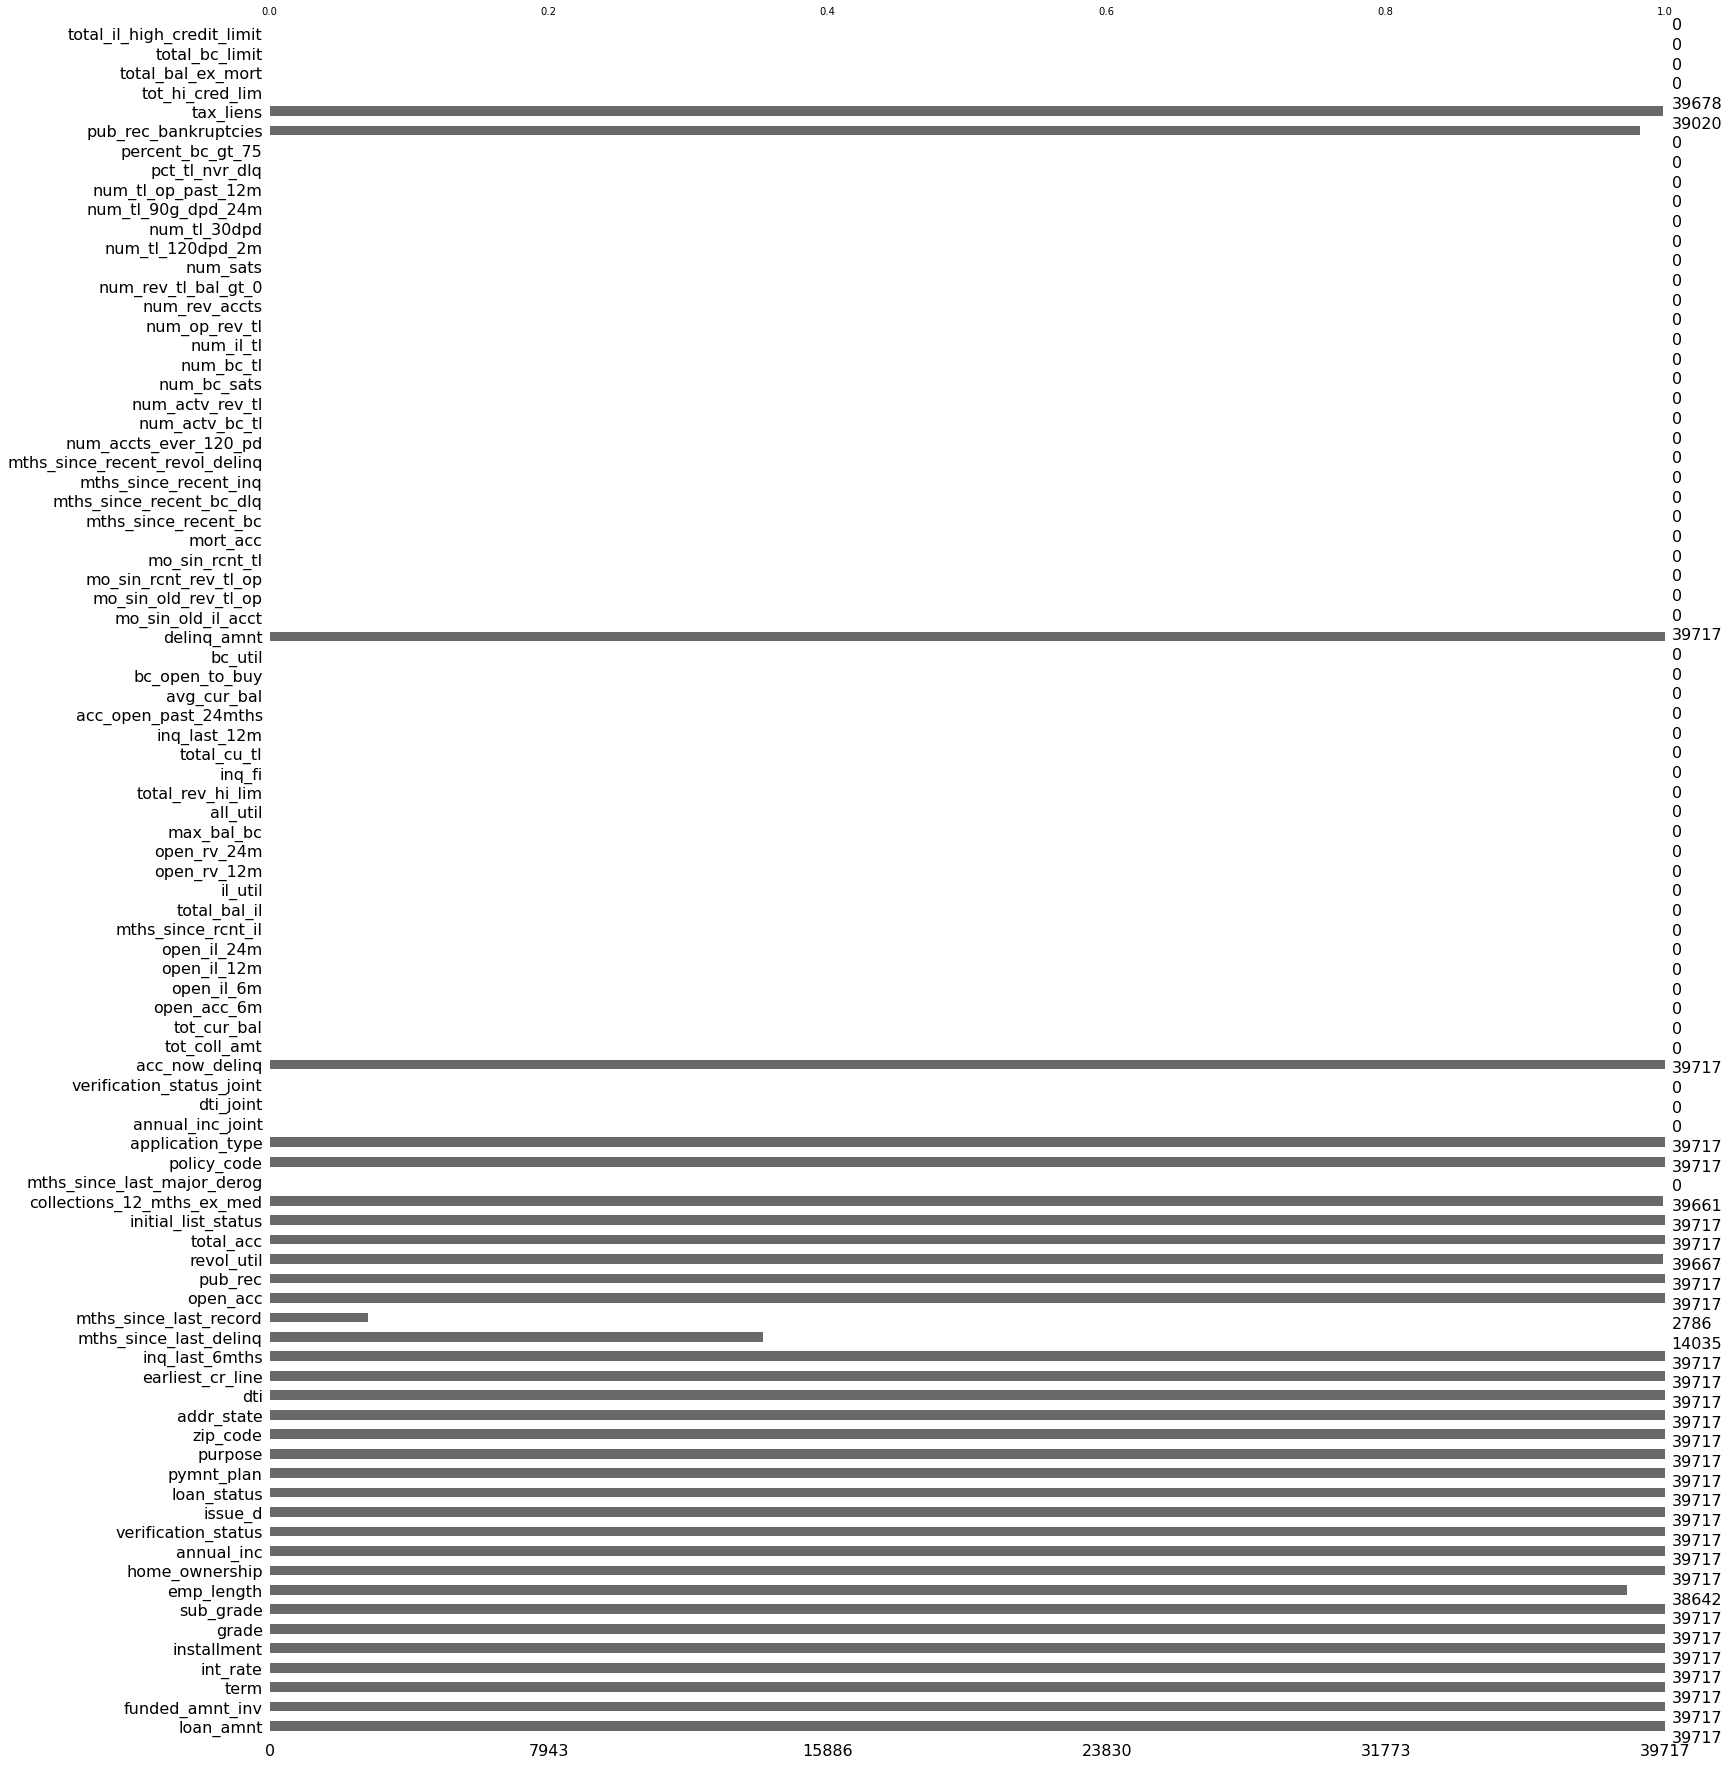

In [10]:
import missingno as no
no.bar(df)

In [11]:
# We will drop the columns which are having more than 50% NULL Values
null_columns=null_df[null_df['% Null values']>=50]['Features']
df.drop(columns=null_columns,inplace=True)
#df.columns                 ##Columns present in the dataset
#np.array(null_columns)     ##Columns that are removed

In [12]:
df.columns                 ##Columns present in the dataset


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
np.array(null_columns)     ##Columns that are removed

array(['mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_t

In [14]:
# Dropping the rows which are having less than 5% of null values in that column
null_df_5=null_df[null_df['% Null values']<5]['Features']
df.dropna(subset=null_df_5 ,axis=0, inplace=True)

In [15]:
#Imputation is done for the columns having more than 5% & less than 50% null values
cols_null=np.array(null_df[(null_df['% Null values']>5) & (null_df['% Null values']<50)]['Features'])
cols_null

#No column exists which is having null values between 5 to 50% 

array([], dtype=object)

In [16]:
#Shape after removing the 100% null valued columns
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 37896
Number of columns: 32


In [17]:
#Checking number of unique values in each column. We should remove the columns that has single value. 
#Those columns will not give us meaningful information
unique_val=pd.DataFrame()
unique_val['Features']=df.nunique().index
unique_val['Unique_Values']=df.nunique().values
unique_val.sort_values(by='Unique_Values')

,Features,Unique_Values
31,tax_liens,1
25,collections_12_mths_ex_med,1
26,policy_code,1
13,pymnt_plan,1
27,application_type,1
24,initial_list_status,1
29,delinq_amnt,1
28,acc_now_delinq,1
2,term,2
30,pub_rec_bankruptcies,3


In [18]:
#Columns that has single value are removed
df.drop(columns=unique_val[unique_val.Unique_Values==1]['Features'],inplace=True)

In [19]:
#Shape after removing all the unwanted columns
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])



Number of rows   : 37896
Number of columns: 24


In [20]:
#Columns left in the dataset
#df.columns

df=df.reset_index(drop=True)        #Index are reset

In [21]:
#Target variable
df['loan_status'].value_counts()

Fully Paid     31533
Charged Off     5265
Current         1098
Name: loan_status, dtype: int64

In [22]:
#Removed those records which are having loan_status as 'Current' and it is irrelevant
df=df[df['loan_status']!='Current']

#Checked for values count
df['loan_status'].value_counts()

Fully Paid     31533
Charged Off     5265
Name: loan_status, dtype: int64

In [23]:
## removing xx at the end of zip code 
df['zip_code'] = df['zip_code'].str.strip('xx')

In [24]:
#Term is given in '36 months' format, changed it to 36
df['term_months']=df['term'].str.strip('months')
df.drop(columns=['term'],inplace=True)

In [25]:
#Intrest rate format was 10.65% , changed to 10.65 & datatype is also changed to float
df['int_rate(%)']=df['int_rate'].str.strip('%').astype('float')
df['revol_util(%)']=df['revol_util'].str.strip('%').astype('float')
df.drop(columns=['int_rate','revol_util'],inplace=True)

In [26]:
#Function to bring the data of emp_len in year only instead of 'n years'
def func(x):
    if '<' in x:
        return 0
    elif '+' in x:
        year= int(x.split('+')[0])
        return year
    else:
        year=int(x.split(' ')[0])
        return year
    

df['emp_length(years)']=df['emp_length'].apply(lambda a:func(a))
df.drop(columns=['emp_length'],inplace=True)

In [27]:
df['issue_d'].value_counts()

2021-12-11    1994
2021-11-11    1970
2021-10-11    1862
2021-09-11    1837
2021-08-11    1751
2021-06-11    1674
2021-07-11    1672
2021-05-11    1554
2021-04-11    1505
2021-03-11    1400
2021-01-11    1336
2021-02-11    1239
2021-12-10    1219
2021-11-10    1096
2021-07-10    1091
2021-10-10    1083
2021-09-10    1057
2021-08-10    1055
2021-06-10     991
2021-05-10     894
2021-04-10     806
2021-03-10     717
2021-02-10     604
2021-11-09     601
2021-12-09     596
2021-01-10     583
2021-10-09     544
2021-09-09     447
2021-08-09     407
2021-07-09     373
2021-06-09     354
2021-05-09     319
2021-04-09     288
2021-03-09     275
2021-02-09     259
2021-01-09     236
2021-12-08     222
2021-11-08     183
2021-04-08     155
2021-03-08     117
2021-10-08      96
2021-07-08      82
2021-05-08      69
2021-08-08      69
2021-06-08      66
2021-09-08      32
2021-02-08       7
2021-01-08       6
2021-12-07       2
2021-11-07       2
2021-10-07       1
Name: issue_d, dtype: int64

In [28]:
df.columns.shape

(24,)

In [29]:
# year , month are saved in different columns 
df['earliest_cr_line_month']=pd.to_datetime(df['earliest_cr_line']).dt.strftime('%m')
df['earliest_cr_line_year']=pd.to_datetime(df['earliest_cr_line']).dt.strftime('%Y')
df['issue_date_month']=pd.to_datetime(df['issue_d']).dt.strftime('%m')
df['issue_date_year']=pd.to_datetime(df['issue_d']).dt.strftime('%Y')


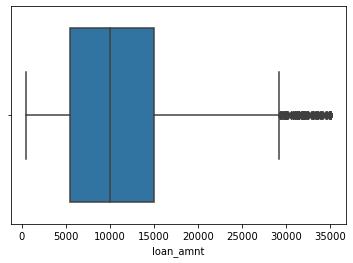

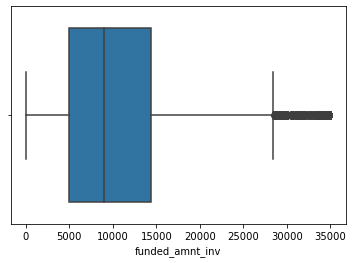

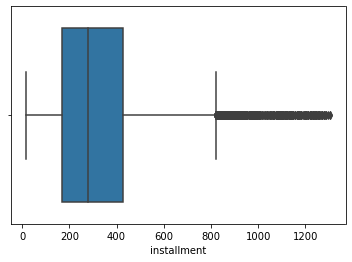

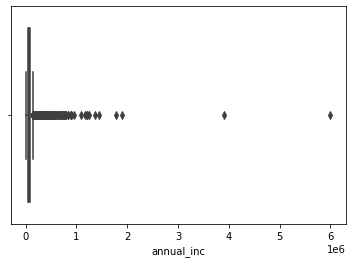

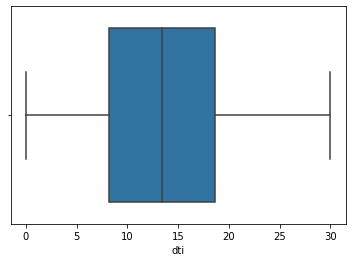

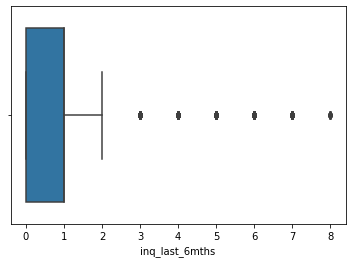

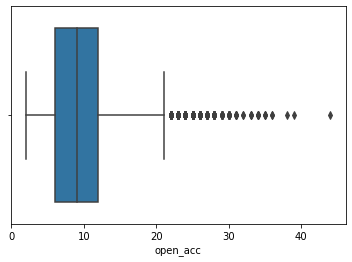

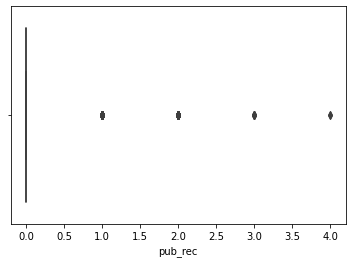

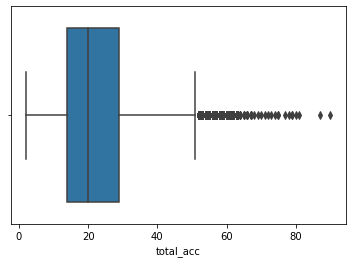

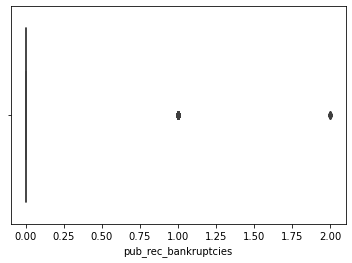

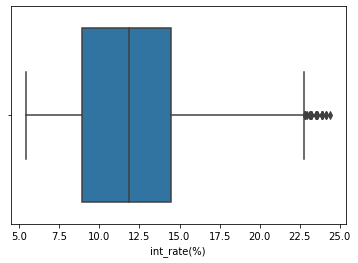

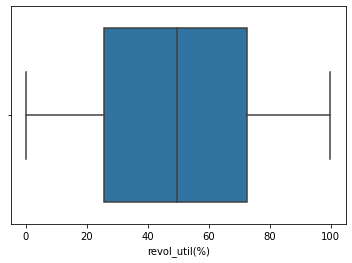

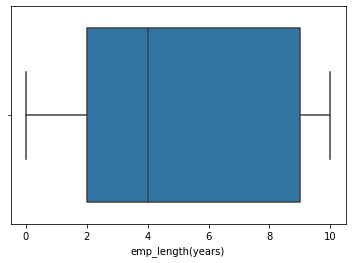

In [30]:
#Individual Boxplot to check outliers in each feature

df_num=df.select_dtypes(include=np.number)

for i in range(len(df_num.columns)):
    sns.boxplot(df_num.iloc[:,i])
    plt.show()


In [31]:
#Skewness is checked for each feature
#annual income has a lot of skew
df.skew().sort_values(ascending=False)

annual_inc                32.099728
pub_rec_bankruptcies       4.631447
pub_rec                    4.606609
inq_last_6mths             1.372857
installment                1.147121
term_months                1.145653
funded_amnt_inv            1.121491
loan_amnt                  1.069983
open_acc                   0.985253
total_acc                  0.826369
earliest_cr_line_year      0.373018
int_rate(%)                0.279099
emp_length(years)          0.206530
zip_code                   0.079523
issue_date_year            0.000000
dti                       -0.030554
revol_util(%)             -0.037978
earliest_cr_line_month    -0.182328
issue_date_month          -0.219586
dtype: float64

In [32]:
#From the above boxplot & skewness values,  
# we should treat outliers in each feature having high skewness individually

# Looking upon the quantile values of each features, we will treat outliers for the some features

#Outlier treatment for Annual income
print('Highest value in the annual income:',df['annual_inc'].max())
print('75% quantile value in the annual income:',df['annual_inc'].quantile(0.75))
print('50% quantile (Mean) value in the annual income:',df['annual_inc'].quantile(0.50))

Highest value in the annual income: 6000000.0
75% quantile value in the annual income: 83000.0
50% quantile (Mean) value in the annual income: 60000.0



Skewness Before: 32.09972777637881


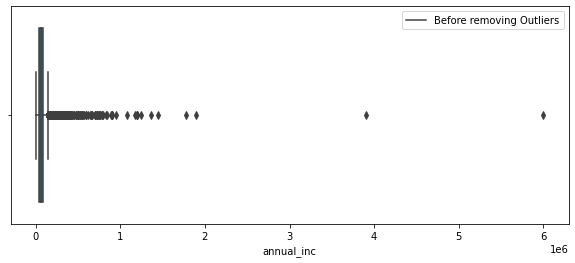

Skewness After: 1.3760761452999963


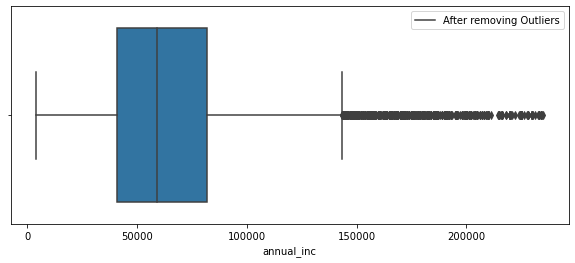

In [33]:
#Before removing outliers
print('\nSkewness Before:',df['annual_inc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['annual_inc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()

#We will remove the values which lies between quantile 99% to 100%
df=df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]
plt.figure(figsize=(10,4))
sns.boxplot(df['annual_inc'])
print('Skewness After:',df['annual_inc'].skew())
plt.legend(labels=['After removing Outliers'])
plt.show()

In [34]:
x= df['annual_inc'] < df['annual_inc'].quantile(0.99)
x.value_counts()

True     36062
False      367
Name: annual_inc, dtype: int64

In [35]:
#total_acc:The total number of credit lines currently in the borrower's credit file
print('Highest value in the total_acc:',df['total_acc'].max())
print('75% quantile value in the total_acc:',df['total_acc'].quantile(0.75))
print('50% quantile (Mean) value in the total_acc:',df['total_acc'].quantile(0.50))

Highest value in the total_acc: 90
75% quantile value in the total_acc: 29.0
50% quantile (Mean) value in the total_acc: 20.0


In [36]:
x= df['total_acc'] < df['total_acc'].quantile(0.98)
x.value_counts()

True     35610
False      819
Name: total_acc, dtype: int64

Highest value in the total_acc: 90
75% quantile value in the total_acc: 29.0
50% quantile (Mean) value in the total_acc: 20.0

Skewness Before: 0.827600176522334


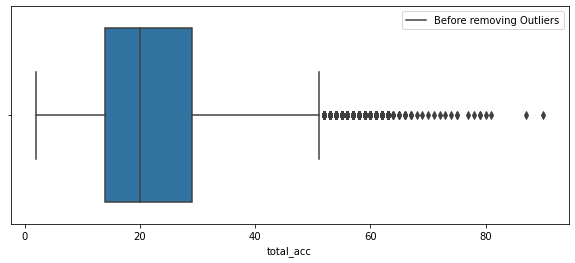

Skewness After: 0.4853312873481121


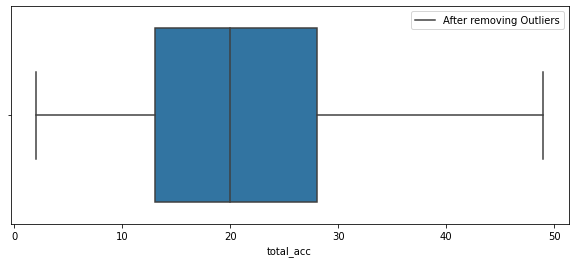

In [37]:
#total_acc:The total number of credit lines currently in the borrower's credit file
print('Highest value in the total_acc:',df['total_acc'].max())
print('75% quantile value in the total_acc:',df['total_acc'].quantile(0.75))
print('50% quantile (Mean) value in the total_acc:',df['total_acc'].quantile(0.50))

#Before removing outliers
print('\nSkewness Before:',df['total_acc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['total_acc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()

#We will remove the values which lies between quantile 98% to 100%
df=df[df['total_acc'] < df['total_acc'].quantile(0.98)]
plt.figure(figsize=(10,4))
sns.boxplot(df['total_acc'])
plt.legend(labels=['After removing Outliers'])
print('Skewness After:',df['total_acc'].skew())
plt.show()

Highest value in the open_acc: 34
75% quantile value in the open_acc: 11.0
50% quantile (Mean) value in the open_acc: 8.0

Skewness Before: 0.8398745752803767


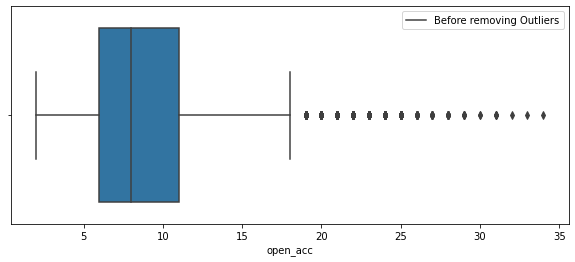

Skewness After: 0.7675630656846745


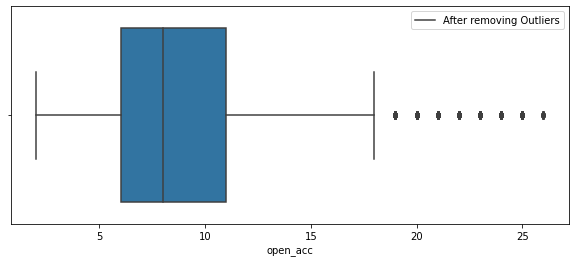

In [38]:
#open_acc : The number of open credit lines in the borrower's credit file.
print('Highest value in the open_acc:',df['open_acc'].max())
print('75% quantile value in the open_acc:',df['open_acc'].quantile(0.75))
print('50% quantile (Mean) value in the open_acc:',df['open_acc'].quantile(0.50))

#Before removing outliers
print('\nSkewness Before:',df['open_acc'].skew())
plt.figure(figsize=(10,4))
sns.boxplot(df['open_acc'])
plt.legend(labels=['Before removing Outliers'])
plt.show()


#We will remove the values which lies between quantile 99.9% to 100%
df=df[df['open_acc'] < df['open_acc'].quantile(0.999)]
plt.figure(figsize=(10,4))
sns.boxplot(df['open_acc'])
plt.legend(labels=['After removing Outliers'])
print('Skewness After:',df['open_acc'].skew())
plt.show()

In [39]:
df['earliest_cr_line_month']=df['earliest_cr_line_month'].astype('int64')
df['earliest_cr_line_year']=df['earliest_cr_line_year'].astype('int64')
df['issue_date_month']=df['issue_date_month'].astype('int64')
df['issue_date_year']=df['issue_date_year'].astype('int64')
df['pub_rec']=df['pub_rec'].astype('int64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35573 entries, 0 to 37895
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               35573 non-null  int64  
 1   funded_amnt_inv         35573 non-null  float64
 2   installment             35573 non-null  float64
 3   grade                   35573 non-null  object 
 4   sub_grade               35573 non-null  object 
 5   home_ownership          35573 non-null  object 
 6   annual_inc              35573 non-null  float64
 7   verification_status     35573 non-null  object 
 8   issue_d                 35573 non-null  object 
 9   loan_status             35573 non-null  object 
 10  purpose                 35573 non-null  object 
 11  zip_code                35573 non-null  object 
 12  addr_state              35573 non-null  object 
 13  dti                     35573 non-null  float64
 14  earliest_cr_line        35573 non-null

In [41]:
df['loan_status']=df['loan_status'].replace({'Fully Paid':0,'Charged Off':1})

In [42]:
# def interest_rate(ints):
#     if ints >=5 and ints <=10:
#         return 'low'
#     elif ints > 10 and ints <=20:
#         return 'medium'
#     else:
#         return 'high'
    
# df['interest_rate_cat'] = df['int_rate(%)'].apply(lambda x: interest_rate(x))
# df['interest_rate_cat'].value_counts()

In [43]:
df.head()

,loan_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,term_months,int_rate(%),revol_util(%),emp_length(years),earliest_cr_line_month,earliest_cr_line_year,issue_date_month,issue_date_year
0,5000,4975.0,162.87,B,B2,RENT,24000.0,Verified,2021-12-11,0,credit_card,860,AZ,27.65,1985-01-01,1,3,0,9,0.0,36,10.65,83.7,10,1,1985,12,2021
1,2500,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,2021-12-11,1,car,309,GA,1.00,1999-04-01,5,3,0,4,0.0,60,15.27,9.4,0,4,1999,12,2021
2,2400,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,2021-12-11,0,small_business,606,IL,8.72,2021-11-01,2,2,0,10,0.0,36,15.96,98.5,10,11,2021,12,2021
3,10000,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,2021-12-11,0,other,917,CA,20.00,1996-02-01,1,10,0,37,0.0,36,13.49,21.0,10,2,1996,12,2021
5,5000,5000.0,156.46,A,A4,RENT,36000.0,Source Verified,2021-12-11,0,wedding,852,AZ,11.20,2021-11-04,3,9,0,12,0.0,36,7.90,28.3,3,11,2021,12,2021


In [44]:
df.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'term_months'],
      dtype='object')

In [45]:
df['loan_status']=df['loan_status'].astype('object')
df_num=df.select_dtypes(include=np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35573 entries, 0 to 37895
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               35573 non-null  int64  
 1   funded_amnt_inv         35573 non-null  float64
 2   installment             35573 non-null  float64
 3   annual_inc              35573 non-null  float64
 4   dti                     35573 non-null  float64
 5   inq_last_6mths          35573 non-null  int64  
 6   open_acc                35573 non-null  int64  
 7   pub_rec                 35573 non-null  int64  
 8   total_acc               35573 non-null  int64  
 9   pub_rec_bankruptcies    35573 non-null  float64
 10  int_rate(%)             35573 non-null  float64
 11  revol_util(%)           35573 non-null  float64
 12  emp_length(years)       35573 non-null  int64  
 13  earliest_cr_line_month  35573 non-null  int64  
 14  earliest_cr_line_year   35573 non-null

In [46]:
df_cat=df.select_dtypes(include=object)
print(df_cat.shape)
df_cat.columns

(35573, 11)


Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'term_months'],
      dtype='object')

In [47]:
df_cat.drop(columns='sub_grade',inplace=True)

In [48]:
df_dummies=pd.get_dummies(df_cat[['home_ownership','grade','verification_status','term_months']],drop_first=True)
df_dummies.shape

(35573, 12)

In [49]:
state=df_cat['addr_state'].unique()
add_dict={}
j=1
for i in state:
    add_dict[i]=j
    j=j+1
df_cat['addr_state']=df_cat['addr_state'].map(add_dict)

In [71]:
state[12]

'PA'

In [52]:
purpose=df_cat['purpose'].unique()
purpose_dict={}
j=1
for i in purpose:
    purpose_dict[i]=j
    j=j+1
df_cat['purpose']=df_cat['purpose'].map(purpose_dict)  

In [74]:
purpose[4]

'wedding'

In [52]:
df_cat.drop(columns=['home_ownership','grade','verification_status','term_months','earliest_cr_line','issue_d'],inplace=True)

#concatenating the df_dummies, df_cat
df_cat=pd.concat([df_cat,df_dummies],axis=1)
df_cat.shape

(35573, 16)

In [53]:
#concaneating without scale 
df_final= pd.concat([df_num,df_cat],axis=1)

In [54]:
df_final2=df_final.copy()

In [55]:
file_name='clean_loan_dataNov17.xlsx'
df_final.to_excel(file_name)

In [56]:
#standardizing - just in case you need it later
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df_numsc=df_final.loc[:,['loan_amnt','funded_amnt_inv','dti','int_rate(%)','revol_util(%)','annual_inc','installment']]
df_numsc=pd.DataFrame(sc.fit_transform(df_numsc),columns=df_numsc.columns)
df_numsc.head()

,loan_amnt,funded_amnt_inv,dti,int_rate(%),revol_util(%),annual_inc,installment
0,-0.827143,-0.772591,2.157559,-0.353840,1.219816,-1.191661,-0.768861
1,-1.171758,-1.131295,-1.857005,0.903584,-1.402421,-1.018856,-1.271193
2,-1.185542,-1.145788,-0.694062,1.091381,1.742145,-1.530015,-1.151752
3,-0.137915,-0.044314,1.005161,0.419122,-0.993027,-0.465878,0.091303
4,-0.827143,-0.768968,-0.320474,-1.102306,-0.735391,-0.846050,-0.800111


In [57]:
df_final_sc=pd.concat([df_numsc,df_final2.drop(columns=df_numsc)])

In [58]:
df_final_sc.head()

,loan_amnt,funded_amnt_inv,dti,int_rate(%),revol_util(%),annual_inc,installment,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,emp_length(years),earliest_cr_line_month,earliest_cr_line_year,issue_date_month,issue_date_year,loan_status,purpose,zip_code,addr_state,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,term_months_ 60
0,-0.827143,-0.772591,2.157559,-0.353840,1.219816,-1.191661,-0.768861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.171758,-1.131295,-1.857005,0.903584,-1.402421,-1.018856,-1.271193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.185542,-1.145788,-0.694062,1.091381,1.742145,-1.530015,-1.151752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.137915,-0.044314,1.005161,0.419122,-0.993027,-0.465878,0.091303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.827143,-0.768968,-0.320474,-1.102306,-0.735391,-0.846050,-0.800111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
file_name_sc='clean_loan_data_scaled_Nov17.xlsx'
df_final_sc.to_excel(file_name_sc)

In [65]:
def interest_rate(ints):
    if ints >= 5 and ints <10:
        return 'low'
    elif ints > 10 and ints <=20:
        return 'medium'
    else:
        return 'high'



In [66]:
d_clean2=pd.read_csv("/Users/shay/Desktop/MIT/Courses/Machine Learning/Project/clean_loan_data_v2.csv")

In [67]:
d_clean2['interest_cat'] = d_clean2['int_rate'].apply(lambda x: interest_rate(x))

In [68]:
file_name3='clean_loan_dataNov17_V2.xlsx'
d_clean2.to_excel(file_name3)